In [17]:
import pandas as pd

In [18]:
import numpy as np

In [19]:
import matplotlib.pyplot as plt

In [20]:
data = pd.read_csv("Student_Performance.csv")

In [21]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [22]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [23]:
data.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

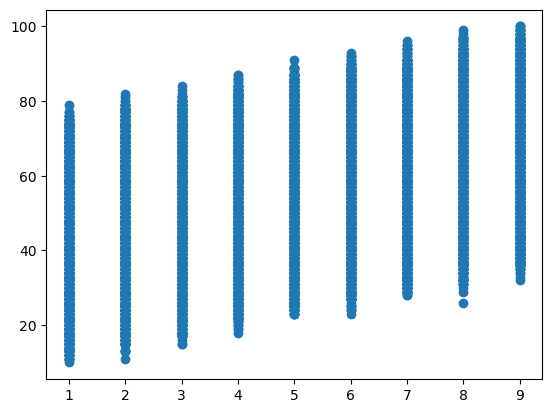

In [24]:
import matplotlib.pyplot as plt
plt.scatter(data['Hours Studied'],	data['Performance Index'])

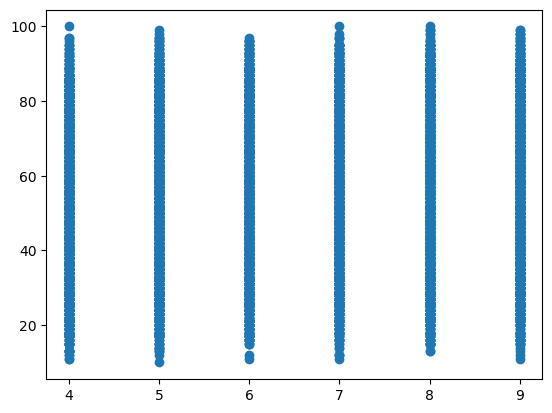

In [25]:
plt.scatter(data['Sleep Hours'],	data['Performance Index'])

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 429.8+ KB


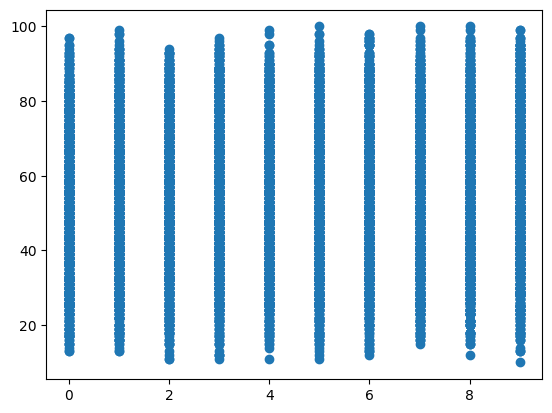

In [27]:
plt.scatter(data['Sample Question Papers Practiced'],data['Performance Index'])

In [28]:
import piplite 
await piplite.install('seaborn')



In [29]:
import seaborn as sns
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


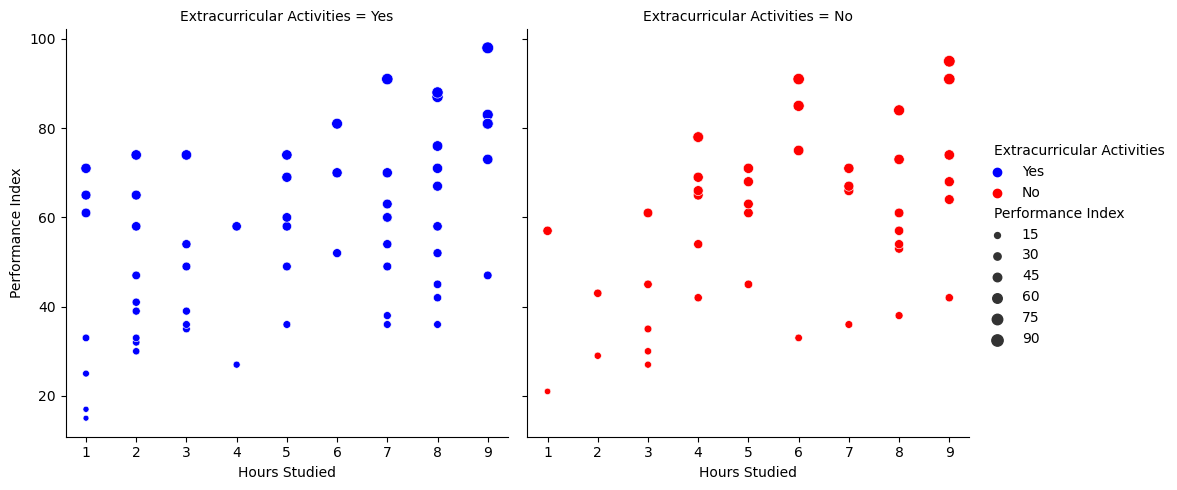

In [30]:
sns.relplot(data=data.head(100),
                x="Hours Studied",
                y="Performance Index",
               # row="Extracurricular Activitie",
                col = "Extracurricular Activities",
                hue="Extracurricular Activities",
                #style="Extracurricular Activities",
                palette = ["b","r"],
                size="Performance Index"
               )

<AxesSubplot:xlabel='Hours Studied', ylabel='Performance Index'>

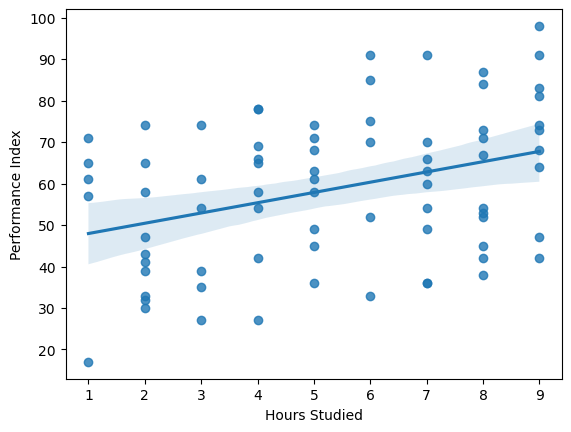

In [31]:
sns.regplot(data=data[:75],x="Hours Studied",y="Performance Index")

In [32]:
data['Extracurricular Activities'].value_counts(normalize=True)

No     0.5052
Yes    0.4948
Name: Extracurricular Activities, dtype: float64

In [33]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [34]:
data.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [39]:
data = data.replace(["Yes","No"],[1,0])
X = data.drop("Performance Index",axis=1)
y = data[["Performance Index"]]
X_train,X_test,y_train,y_test = train_test_split(X.values,y.values,test_size=0.2)

In [40]:
model = LinearRegression().fit(X_train,y_train)

In [41]:
model.score(X_test,y_test)

0.9888586102176788

In [42]:
model.predict(X)

/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[91.82901462],
       [63.14406568],
       [45.07609424],
       ...,
       [73.00587476],
       [94.3436886 ],
       [65.27775035]])

In [44]:
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0
